# Implement-PCA-with-Gradient-Ascent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(500)

X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0, 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3 + np.random.normal(0, 10, size=100)

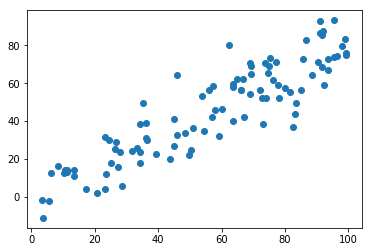

In [3]:
plt.scatter(X[:, 0], X[:, 1])

# demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

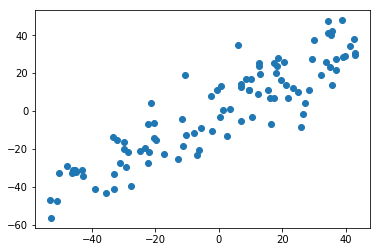

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])

In [7]:
np.mean(X_demean, axis=0)

array([-1.20081722e-14,  1.02318154e-14])

# Gradient Ascent

In [8]:
def f(w, X):
    return np.sum(X.dot(w) ** 2) / len(X)

In [9]:
def df(w, X):
    return X.T.dot(X.dot(w)) * 2 / len(X)

In [10]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
        
    return w

In [11]:
initial_w = np.random.random(X.shape[1])
eta = 0.001

In [12]:
gradient_ascent(X_demean, initial_w, eta)

array([0.74974184, 0.66173044])

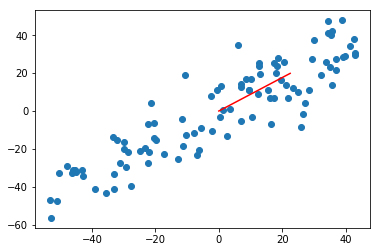

In [13]:
w = gradient_ascent(X_demean, initial_w, eta)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='r')